# Project 3 

The objective of project  is to perform keyword network analysis and word frequency
analysis.  


### Import the Dataset    

You can find the source dataset here:  
https://docs.google.com/spreadsheets/d/1GTwv07i98vL7S-J9eeP8NV1fJVnymm1eJ31RDyt4Mxw/edit?usp=sharing

In [75]:
## Loading the csv file into keywords_data_file

import pandas as pd
pd.set_option('display.max_rows', None)

keywords_data_file = pd.read_csv('Keyword_data.csv')
keywords_data_file.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN


###  Write a Python code to extract keyword data from the above file. 
Convert it to a weighted adjacency matrix. See the figure below to understand the process

##### Selecting columns from Keyword1 to Keyword 12 to work with and storing it in selected_columns

![Task Two - Adjacency matrix](Task%202%20-%20Figure%201.png)

In [76]:
## YOUR CODE HERE
selected_columns = keywords_data_file.iloc[:, 1:13]
selected_columns

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN


##### Removing rows which has all the column values as  NaN values and also removing only the NaN enrties from rows which has valid keyword data and storing the cleaned dataset in cleaned_data

In [77]:
## Iterating over rows in selected_columns
## dropping NaN values and appending the result to cleaned_row
## Finally saving data in cleaned_data

cleaned_data = []
for index,row in selected_columns.iterrows():
    cleaned_row = row.dropna().tolist()
    cleaned_data.append(cleaned_row)

cleaned_data

[[],
 [],
 ['EQUITY',
  'ORGANIZATIONAL sociology',
  'PERFORMANCE',
  'META-analysis',
  'PSYCHOMETRICS',
  'ORGANIZATIONAL research',
  'FINANCIAL performance',
  'AGENCY theory',
  'ORGANIZATIONAL effectiveness',
  'ORGANIZATIONAL behavior',
  'CORPORATE governance'],
 ['DIVERSIFICATION in industry',
  'BUSINESS planning',
  'PERFORMANCE standards',
  'EMPLOYEES -- Rating of',
  'CORPORATE culture',
  'STRATEGIC planning',
  'ORGANIZATIONAL effectiveness',
  'MANAGEMENT science',
  'MANAGEMENT research',
  'PRODUCT management'],
 ['INTERORGANIZATIONAL relations',
  'INTERGROUP relations',
  'BUSINESS communication',
  'INVESTMENTS',
  'SUPPLY chains',
  'KNOWLEDGE management',
  'INTERORGANIZATIONAL networks',
  'CORPORATE governance',
  'GROUP decision making',
  'INTELLECTUAL capital'],
 ['EXECUTIVE compensation',
  'WAGES',
  'HUMAN capital',
  'LABOR economics',
  'PERSONNEL management',
  'MANAGEMENT science',
  'CONTINGENCY theory (Management)',
  'COMPENSATION management',
  

##### Filtering the data from cleaned_dataset. Checking for the stop_words in keywords and converting it to lower case .The filtered_data list  contains rows of words with stopwords removed. 


In [78]:
## nltk (Natural Language Toolkit)  library is used for natural language processing tasks.
## english stopwords are loaded from nltk.corpus.stopwords
## Iterates over the cleaned_data and converts the word to lowercase using word.lower() to make the comparison case-insensitive.
## If the word (in lowercase) is not in the stop_words set, it is added to the keywords list.
## The keywords list contains words from the current row, excluding any stopwords.
## Appends the keywords list (filtered words of the current row) to the filtered_data list.
## The filtered_data list now contains rows of words with stopwords removed. 

import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered_data=[]

for row in cleaned_data:
    if len(row)!= 0:       
        keywords =[]
        for word in row:
            if word.lower() not in stop_words:
            #if word.lower():
            
                keywords.append(word.lower())
        filtered_data.append(keywords) 
    
          
filtered_data             
            

[['equity',
  'organizational sociology',
  'performance',
  'meta-analysis',
  'psychometrics',
  'organizational research',
  'financial performance',
  'agency theory',
  'organizational effectiveness',
  'organizational behavior',
  'corporate governance'],
 ['diversification in industry',
  'business planning',
  'performance standards',
  'employees -- rating of',
  'corporate culture',
  'strategic planning',
  'organizational effectiveness',
  'management science',
  'management research',
  'product management'],
 ['interorganizational relations',
  'intergroup relations',
  'business communication',
  'investments',
  'supply chains',
  'knowledge management',
  'interorganizational networks',
  'corporate governance',
  'group decision making',
  'intellectual capital'],
 ['executive compensation',
  'wages',
  'human capital',
  'labor economics',
  'personnel management',
  'management science',
  'contingency theory (management)',
  'compensation management',
  'executive

##### Co-occureence pairs : The unique pairs of keywords that appear together. 
##### Co-occurrence matrix or adjacency matrix : It captures how frequently each pair of keywords appears together across entire dataset.  
##### In co-occurrence analysis, the nodes are words, and the edges represent co-occurrences. The weight of an edge is the frequency of co-occurrence.

In [79]:
###sorting the keywords before forming  co-occurrence pairs

co_occurrence_pairs =[]

for row in (filtered_data):
    #print(row)
    
    pairs = [tuple(sorted((row[i], row[j]))) for i in range(len(row)) for j in range(i + 1, len(row))]
    co_occurrence_pairs.extend(pairs)
        
co_occurrence_pairs



[('equity', 'organizational sociology'),
 ('equity', 'performance'),
 ('equity', 'meta-analysis'),
 ('equity', 'psychometrics'),
 ('equity', 'organizational research'),
 ('equity', 'financial performance'),
 ('agency theory', 'equity'),
 ('equity', 'organizational effectiveness'),
 ('equity', 'organizational behavior'),
 ('corporate governance', 'equity'),
 ('organizational sociology', 'performance'),
 ('meta-analysis', 'organizational sociology'),
 ('organizational sociology', 'psychometrics'),
 ('organizational research', 'organizational sociology'),
 ('financial performance', 'organizational sociology'),
 ('agency theory', 'organizational sociology'),
 ('organizational effectiveness', 'organizational sociology'),
 ('organizational behavior', 'organizational sociology'),
 ('corporate governance', 'organizational sociology'),
 ('meta-analysis', 'performance'),
 ('performance', 'psychometrics'),
 ('organizational research', 'performance'),
 ('financial performance', 'performance'),
 ('

In [80]:
weighted_co_occurrences = nltk.FreqDist(co_occurrence_pairs)

for key,value in weighted_co_occurrences.items():
    print(f"{key} : {value}")


('equity', 'organizational sociology') : 1
('equity', 'performance') : 1
('equity', 'meta-analysis') : 1
('equity', 'psychometrics') : 1
('equity', 'organizational research') : 1
('equity', 'financial performance') : 1
('agency theory', 'equity') : 1
('equity', 'organizational effectiveness') : 1
('equity', 'organizational behavior') : 1
('corporate governance', 'equity') : 1
('organizational sociology', 'performance') : 2
('meta-analysis', 'organizational sociology') : 1
('organizational sociology', 'psychometrics') : 1
('organizational research', 'organizational sociology') : 2
('financial performance', 'organizational sociology') : 1
('agency theory', 'organizational sociology') : 3
('organizational effectiveness', 'organizational sociology') : 4
('organizational behavior', 'organizational sociology') : 6
('corporate governance', 'organizational sociology') : 1
('meta-analysis', 'performance') : 1
('performance', 'psychometrics') : 1
('organizational research', 'performance') : 1
('

In [59]:
#weighted_co_occurrences_items= sorted(weighted_co_occurrences.items() ,key=lambda item: item[1], reverse=True)
#weighted_co_occurrences_items

[(('organizational behavior', 'organizational effectiveness'), 11),
 (('organizational behavior', 'organizational structure'), 9),
 (('organizational behavior', 'personnel management'), 8),
 (('management science', 'organizational behavior'), 7),
 (('organizational behavior', 'organizational sociology'), 6),
 (('corporate governance', 'organizational behavior'), 6),
 (('decision making', 'organizational behavior'), 6),
 (('organizational effectiveness', 'organizational structure'), 6),
 (('industrial relations', 'organizational behavior'), 5),
 (('organizational behavior', 'organizational change'), 5)]

###   Read the adjacency matrix and convert it into a weighted network

In [81]:

# Build the weighted co-occurrence network

## NetworkX (nx): A Python library is used for creating, analyzing, and visualizing complex networks (graphs).
## Matplotlib (plt): Used here to visualize the graph.
## nx.Graph(): Creates an undirected graph
## word1 and word2 represent nodes (words) in the co-occurrence pair.
## weight is the frequency of the co-occurrence (edge weight).
## At the end , G.add_edge :adds an edge between word1 and word2.
## The weight of the edge is stored as an attribute (weight).
## After looping the graph has  Nodes: All unique words from the co-occurrence pairs.
## Edges: Connections between words, weighted by their co-occurrence frequency.


import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for (word1, word2), weight in weighted_co_occurrences.items():
    G.add_edge(word1, word2, weight=weight)

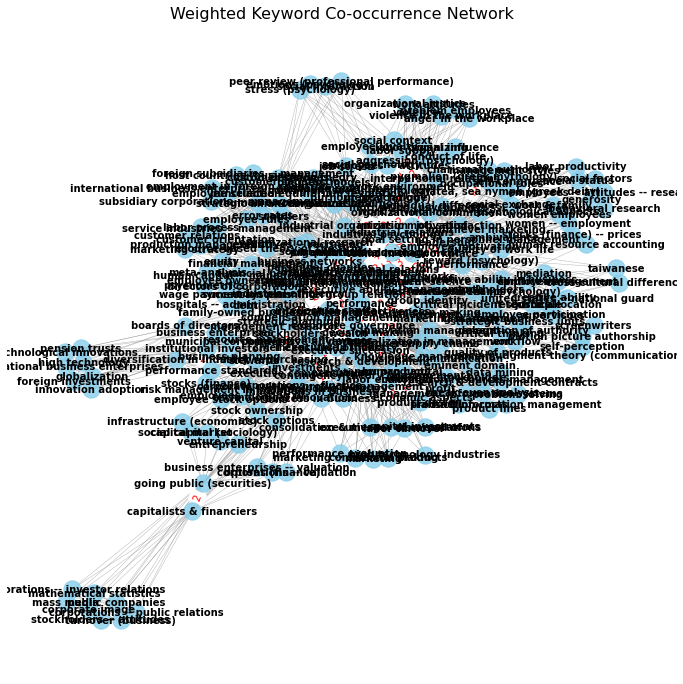

In [82]:
# Customized weighted graph visualization

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Set seed for reproducibility

edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_weights_normalized = [weight / max(edge_weights) * 5 for weight in edge_weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_weights_normalized, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

# Display edge weights as labels for weights greater than 1
edge_labels = {(word1, word2): f'{weight}' for (word1, word2, weight) in G.edges(data='weight') if weight > 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Weighted Keyword Co-occurrence Network", fontsize=16)
plt.axis('off')  # Turn off axis labels
plt.show()

###  Compute node degree and strength

##### Node degree: The degree of a node is a number of edges connected to it.


The **degree** of a node \( i \), denoted as \($ k_i $\), is the number of edges connected to the node.

For an undirected graph:

\$\$
\[
k_i = \sum_{j} A_{ij}
\]
\$\$
Where:
- \( $A_{ij} = 1$ \) if there is an edge between nodes \( i \) and \( j \), otherwise \($ A_{ij} = 0 $\).



In [83]:
## Returns a view of the degrees for all nodes in the graph G.
## Converts the degree view object returned by G.degree() into a dictionary.


degrees = dict(G.degree())  # Degree of all nodes
degrees

{'equity': 10,
 'organizational sociology': 66,
 'performance': 23,
 'meta-analysis': 10,
 'psychometrics': 10,
 'organizational research': 24,
 'financial performance': 19,
 'agency theory': 38,
 'organizational effectiveness': 104,
 'organizational behavior': 166,
 'corporate governance': 62,
 'business planning': 29,
 'diversification in industry': 18,
 'performance standards': 9,
 'employees -- rating of': 9,
 'corporate culture': 9,
 'strategic planning': 66,
 'management science': 102,
 'management research': 17,
 'product management': 24,
 'intergroup relations': 16,
 'interorganizational relations': 24,
 'business communication': 9,
 'investments': 25,
 'supply chains': 9,
 'knowledge management': 19,
 'interorganizational networks': 18,
 'group decision making': 27,
 'intellectual capital': 20,
 'executive compensation': 31,
 'wages': 17,
 'human capital': 17,
 'labor economics': 17,
 'personnel management': 93,
 'contingency theory (management)': 9,
 'compensation management'

##### Node strength: The strength of a node is the sum of the weights of all edges connected to it.

The **strength** of a node \( i \), denoted as \($ s_i $\), is the sum of the weights of edges connected to the node.

For an undirected graph:
\$\$
\[
s_i = \sum_{j} W_{ij}
\]
\$\$
Where:
- \($ W_{ij} $\) is the weight of the edge between nodes \( i \) and \( j \).


In [84]:
## G.node () :Returns all nodes in the graph G.
## G.edges(node, data=True): Returns all edges connected to a specific node, including their weight.
## Each edge is represented as a tuple: (node1, node2, data), where data is a dictionary containing edge weight.
##Sum of Weights: For each node, the code iterates through its connected edges and extracts the 'weight' from the data dictionary.
## The sum() function computes the total weight of all edges connected to the node.


strengths = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
strengths


{'equity': 10,
 'organizational sociology': 96,
 'performance': 29,
 'meta-analysis': 10,
 'psychometrics': 10,
 'organizational research': 28,
 'financial performance': 21,
 'agency theory': 48,
 'organizational effectiveness': 144,
 'organizational behavior': 265,
 'corporate governance': 85,
 'business planning': 31,
 'diversification in industry': 20,
 'performance standards': 9,
 'employees -- rating of': 9,
 'corporate culture': 9,
 'strategic planning': 80,
 'management science': 136,
 'management research': 19,
 'product management': 28,
 'intergroup relations': 17,
 'interorganizational relations': 27,
 'business communication': 9,
 'investments': 25,
 'supply chains': 9,
 'knowledge management': 20,
 'interorganizational networks': 19,
 'group decision making': 30,
 'intellectual capital': 20,
 'executive compensation': 36,
 'wages': 18,
 'human capital': 18,
 'labor economics': 18,
 'personnel management': 126,
 'contingency theory (management)': 9,
 'compensation management

##### Combining the output of strength and degree for each node 

In [85]:

for key,value in strengths.items():
    print(f"Node: {key}, Degree: {degrees[key]},  Strength: {value}")



Node: equity, Degree: 10,  Strength: 10
Node: organizational sociology, Degree: 66,  Strength: 96
Node: performance, Degree: 23,  Strength: 29
Node: meta-analysis, Degree: 10,  Strength: 10
Node: psychometrics, Degree: 10,  Strength: 10
Node: organizational research, Degree: 24,  Strength: 28
Node: financial performance, Degree: 19,  Strength: 21
Node: agency theory, Degree: 38,  Strength: 48
Node: organizational effectiveness, Degree: 104,  Strength: 144
Node: organizational behavior, Degree: 166,  Strength: 265
Node: corporate governance, Degree: 62,  Strength: 85
Node: business planning, Degree: 29,  Strength: 31
Node: diversification in industry, Degree: 18,  Strength: 20
Node: performance standards, Degree: 9,  Strength: 9
Node: employees -- rating of, Degree: 9,  Strength: 9
Node: corporate culture, Degree: 9,  Strength: 9
Node: strategic planning, Degree: 66,  Strength: 80
Node: management science, Degree: 102,  Strength: 136
Node: management research, Degree: 17,  Strength: 19


###  Show the top 10 nodes by degree and top 10 nodes by strength

In [86]:

# Sort nodes by degree in descending order and select the top 10

top_10_nodes_by_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by degree:")

for node, degree in top_10_nodes_by_degree:
    print(f"Node: {node}, Degree: {degree}")


Top 10 nodes by degree:
Node: organizational behavior, Degree: 166
Node: organizational effectiveness, Degree: 104
Node: management science, Degree: 102
Node: personnel management, Degree: 93
Node: decision making, Degree: 90
Node: organizational structure, Degree: 74
Node: organizational sociology, Degree: 66
Node: strategic planning, Degree: 66
Node: industrial management, Degree: 64
Node: corporate governance, Degree: 62


In [87]:
strengths = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

top_10_nodes_by_strengths = sorted(strengths.items() ,key=lambda x:x[1], reverse =True)[:10]
print("Top 10 nodes by strengths:")

for node, strength in top_10_nodes_by_strengths:
    print(f"Node: {node}, Strength: {strength}")

Top 10 nodes by strengths:
Node: organizational behavior, Strength: 265
Node: organizational effectiveness, Strength: 144
Node: management science, Strength: 136
Node: personnel management, Strength: 126
Node: decision making, Strength: 112
Node: organizational structure, Strength: 107
Node: organizational sociology, Strength: 96
Node: corporate governance, Strength: 85
Node: industrial management, Strength: 84
Node: strategic planning, Strength: 80


###  Show the top 10 node pairs by weight

In [88]:

top_10_node_pairs_by_weight= sorted(weighted_co_occurrences.items() ,key=lambda item: item[1], reverse=True)[:10]
print("Top 10 node pairs by weight:")

for key , value in top_10_node_pairs_by_weight:
    print(f"{key}, Weight:{value}")

Top 10 node pairs by weight:
('organizational behavior', 'organizational effectiveness'), Weight:11
('organizational behavior', 'organizational structure'), Weight:9
('organizational behavior', 'personnel management'), Weight:8
('management science', 'organizational behavior'), Weight:7
('organizational behavior', 'organizational sociology'), Weight:6
('corporate governance', 'organizational behavior'), Weight:6
('decision making', 'organizational behavior'), Weight:6
('organizational effectiveness', 'organizational structure'), Weight:6
('industrial relations', 'organizational behavior'), Weight:5
('organizational behavior', 'organizational change'), Weight:5


###  Plot strength on y-axis and degree on x-axis

In [89]:
## YOUR CODE HERE

x= list(degrees.values())
y= list(strengths.values())

#print("x values:",x)
#print("y values:",y)

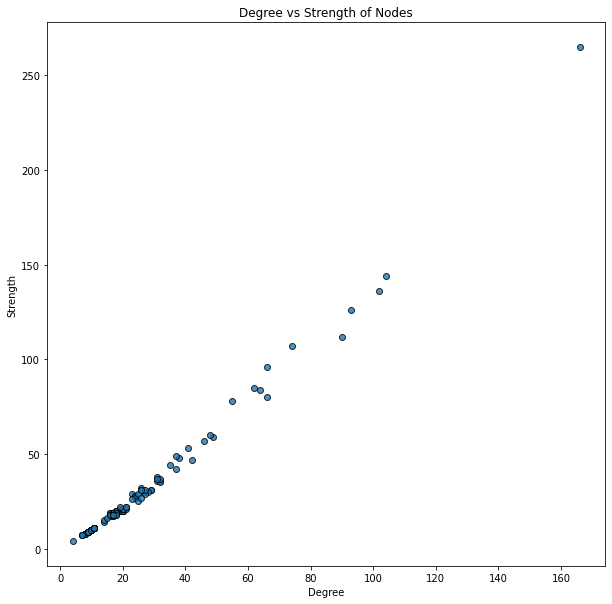

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(x, y, alpha=0.8, edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("Strength")
plt.title("Degree vs Strength of Nodes")
plt.grid(False)
plt.show()

